# Project Student Mental Health  - Data Eagles

By David Loder, Dorothy Monneh Singbe, Aidan Kearney, Aamenah Cheema

## What is the Project Focus and Dataset of the project?
- The Project Focus is exploring Student Mental Health and how it affects students. 
- The Dataset is a survey collection from students attending the International Islamic University of Malaysia in the year of 2020. The reason we chose this as it was the best information we could find on mental health with the realistic goal of understanding the data in two weeks.



## Data Exploration
- Top Majors that suffer from depression
- Explanation of some majors
- Male & Female Comparison
- Numbers for those seeking treatment

## Hypothesis
- Students of a specific gender in this dataset is more likey to have higher mental issues than another.
- Students who attend this school that major in science or technical majors are more like to suffer from depression, anxiety, or panic attacks.

## Probability
- Probability of those majors suffering from mental disorder

## Sampling
- Run a sample of 1000 students

https://www.kaggle.com/datasets/shariful07/student-mental-health?resource=download

The Data collected from International Islamic University Malaysia

In [14]:
# Import Numpy and Datascience modules.
import math
import numpy as np
import pandas as pd
from datascience import *

# Plotting modules
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)
# Fix for datascience collections Iterable
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Data Exploration

#### Functions for project

In [15]:
def relabel(table,column,search,replace):
    for i in range(len(table.column(column))):
        if search.lower() == table.column(column)[i].lower():
            table.column(column)[i] = replace
        else:
            pass

### The Dataset

The Dataset is a survey collection from students attending the International Islamic University of Malaysia in the year of 2020.The total amount of students who took the survey is 101. 

In [16]:
datafile = "Student Mental health.csv"
students = Table.read_table(datafile)
students = students.relabeled(["Choose your gender","What is your course?","Your current year of Study","What is your CGPA?","Marital status","Do you have Depression?","Do you have Anxiety?","Do you have Panic attack?","Did you seek any specialist for a treatment?"], ["Gender","Major","Year","GPA","Married","Depression","Anxiety",
"Panic Attacks","Treatment"]
)
students_nan_age = students.where("Age",are.above(0))
relabel(students,"Major","Engine","Engineering")
relabel(students,"Major","Engin","Engineering")
relabel(students,"Major","psychology","Psychology")
relabel(students,"Major","BCS","Computer Science")
relabel(students,"Major","BIT","Business Information Technology")
relabel(students,"Major","IT","Information Technology")
relabel(students,"Major","Fiqh","Islamic Law")
relabel(students,"Major","koe","Koe")
## relabel(students,"GPA","0 - 1.99","1")
## relabel(students,"GPA","2.00 - 2.49","2")
## relabel(students,"GPA","2.50 - 2.99","3")
students


Timestamp,Gender,Age,Major,Year,GPA,Married,Depression,Anxiety,Panic Attacks,Treatment
8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 12:05,Male,19,Business Information Te,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
8/7/2020 12:31,Male,19,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
8/7/2020 12:32,Female,23,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
8/7/2020 12:33,Female,18,Computer Science,year 1,3.50 - 4.00,No,No,Yes,No,No
8/7/2020 12:35,Female,19,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
8/7/2020 12:39,Male,18,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


#### Student Age Numbers

These values how the number values of all students based off age

In [17]:
student_min_age = min(students_nan_age.column("Age"))
print("The minimum age of all students is " + str(student_min_age))

The minimum age of all students is 18.0


In [18]:
student_max_age = max(students_nan_age.column("Age"))
print("The maximum age of all students is " + str(student_max_age))

The maximum age of all students is 24.0


In [19]:
student_median_age = np.median(students_nan_age.column("Age"))
print("The median age of all students is " + str(student_median_age))

The median age of all students is 19.0


In [20]:
student_mean_age = np.mean(students_nan_age.column("Age"))
print("The mean age of all students is " + str(student_mean_age))

The mean age of all students is 20.53


In [21]:
student_standard_deviation_age = np.std(students_nan_age.column("Age"))
print("The standard deviation of age of all students is " + str(student_standard_deviation_age))

The standard deviation of age of all students is 2.48376729989


#### Students with Depression

This shows all the table and number values of students that have reported depression

In [22]:
students_with_depression=students.where("Depression",are.equal_to("Yes"))
print("The total amount of students that have reported they have depression is ", str(students_with_depression.num_rows))

The total amount of students that have reported they have depression is  35


In [23]:
female_students_with_depression = students_with_depression.where("Gender",are.equal_to("Female"))
print("The total amount of female students that have reported they have depression is ", str(female_students_with_depression.num_rows))

The total amount of female students that have reported they have depression is  29


In [24]:
male_students_with_depression = students_with_depression.where("Gender",are.equal_to("Male"))
print("The total amount of male students that have reported they have depression is ", str(male_students_with_depression.num_rows))

The total amount of male students that have reported they have depression is  6


#### Students with Anxiety

This shows all the table and number values of students that have reported anxiety

In [25]:
students_with_anxiety = students.where("Anxiety",are.equal_to("Yes"))
print("The total amount of students that have reported they have anxiety is ", str(students_with_anxiety.num_rows))

The total amount of students that have reported they have anxiety is  34


In [26]:
female_students_with_anxiety = students_with_anxiety.where("Gender",are.equal_to("Female"))
print("The total amount of female students that have reported they have depression is ", str(female_students_with_anxiety.num_rows))

The total amount of female students that have reported they have depression is  24


In [27]:
male_students_with_anxiety = students_with_anxiety.where("Gender",are.equal_to("Male"))
print("The total amount of male students that have reported they have depression is ", str(male_students_with_anxiety.num_rows))

The total amount of male students that have reported they have depression is  10


#### Students with Panic Attacks

This shows all the table and number values of students that have reported panic attacks

In [28]:
students_with_panic_attacks = students.where("Panic Attacks",are.equal_to("Yes"))
print("The total amount of students that have reported they have panic attacks is ", str(students_with_panic_attacks.num_rows))

The total amount of students that have reported they have panic attacks is  33


In [29]:
female_students_with_panic_attacks = students_with_panic_attacks.where("Gender",are.equal_to("Female"))
print("The total amount of female students that have reported they have depression is ", str(female_students_with_panic_attacks.num_rows))

The total amount of female students that have reported they have depression is  25


In [30]:
male_students_with_panic_attacks = students_with_panic_attacks.where("Gender",are.equal_to("Male"))
print("The total amount of male students that have reported they have depression is ", str(male_students_with_panic_attacks.num_rows))

The total amount of male students that have reported they have depression is  8


#### Majors with Depression

In [31]:
students_with_depression.group("Major").sort("count", descending=True)

Major,count
Engineering,7
Business Information Te,5
Computer Science,5
BENL,2
Koe,2
Psychology,2
ALA,1
Communication,1
ENM,1
Econs,1


In [32]:
female_students_with_depression.group("Major").sort("count", descending=True)

Major,count
Engineering,5
Business Information Te,4
Computer Science,3
BENL,2
Koe,2
Psychology,2
ALA,1
Communication,1
ENM,1
Econs,1


In [33]:
male_students_with_depression.group("Major").sort("count", descending=True)

Major,count
Computer Science,2
Engineering,2
Business Information Te,1
MHSC,1


In [44]:
female_students_with_anxiety.group("Major").sort("count", descending=True)

Major,count
Business Information Te,5
Computer Science,4
Koe,3
Engineering,2
Psychology,2
BENL,1
Communication,1
ENM,1
Econs,1
KENMS,1


In [45]:
male_students_with_anxiety.group("Major").sort("count", descending=True)

Major,count
Business Information Te,3
Computer Science,2
Engineering,2
Irkhs,1
Islamic education,1
Koe,1


In [46]:
female_students_with_panic_attacks.group("Major").sort("count", descending=True)

Major,count
Engineering,4
Business Information Te,3
Computer Science,3
Koe,2
ALA,1
CTS,1
Communication,1
DIPLOMA TESL,1
ENM,1
Human Sciences,1


In [47]:
male_students_with_panic_attacks.group("Major").sort("count", descending=True)

Major,count
Computer Science,2
Engineering,2
Business Information Te,1
Irkhs,1
MHSC,1
TAASL,1


## Probability

The percentage of all students that have depression

In [93]:
student_depression_percentage = 100*sum(students_with_depression.group("Major").column("count"))/sum(students.group("Major").column("count"))
student_depression_percentage

34.653465346534652

In [95]:
female_student_depression_percentage = 100*sum(female_students_with_depression.group("Major").column("count"))/sum(students.group("Major").column("count"))
female_student_depression_percentage

28.712871287128714

In [96]:
male_student_depression_percentage = 100*sum(male_students_with_depression.group("Major").column("count"))/sum(students.group("Major").column("count"))
male_student_depression_percentage

5.9405940594059405

The percentage of all students that have anxiety

In [94]:
student_anxiety_percentage = 100*sum(students_with_anxiety.group("Major").column("count"))/sum(students.group("Major").column("count"))
student_anxiety_percentage

33.663366336633665

In [97]:
female_student_anxiety_percentage = 100*sum(female_students_with_anxiety.group("Major").column("count"))/sum(students.group("Major").column("count"))
female_student_anxiety_percentage

23.762376237623762

In [98]:
male_student_anxiety_percentage = 100*sum(male_students_with_anxiety.group("Major").column("count"))/sum(students.group("Major").column("count"))
male_student_anxiety_percentage

9.9009900990099009

The percentage of all students that have panic attacks

In [101]:
student_panic_attack_percentage = 100*sum(students_with_panic_attacks.group("Major").column("count"))/sum(students.group("Major").column("count"))
student_panic_attack_percentage

32.67326732673267

In [102]:
female_student_panic_attack_percentage = 100*sum(female_students_with_panic_attacks.group("Major").column("count"))/sum(students.group("Major").column("count"))
female_student_panic_attack_percentage

24.752475247524753

In [103]:
male_student_panic_attack_percentage = 100*sum(male_students_with_panic_attacks.group("Major").column("count"))/sum(students.group("Major").column("count"))
male_student_panic_attack_percentage

7.9207920792079207

### Probability with iterations

Probability of random chance students will face a form of mental disorder

In [99]:
depression_option = students.group("Depression").column("Depression")
anxiety_option = students.group("Anxiety").column("Anxiety")
panic_attack_option = students.group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder
    

85.148514851485146

Female Probability

In [13]:
depression_option = students.where("Gender",are.equal_to("Female")).group("Depression").column("Depression")
anxiety_option = students.where("Gender",are.equal_to("Female")).group("Anxiety").column("Anxiety")
panic_attack_option = students.where("Gender",are.equal_to("Female")).group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder

90.099009900990097

Male Probability

In [34]:
depression_option = students.where("Gender",are.equal_to("Male")).group("Depression").column("Depression")
anxiety_option = students.where("Gender",are.equal_to("Male")).group("Anxiety").column("Anxiety")
panic_attack_option = students.where("Gender",are.equal_to("Male")).group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder

88.118811881188122

Probability of depression

In [35]:
depression_option = students.group("Depression").column("Depression")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    depression = np.random.choice(depression_option)
    if depression == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder
    

56.435643564356432

In [73]:
anxiety_option = students.group("Anxiety").column("Anxiety")
num_observations = sum(students.group("Major").column("count"))

yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    if anxiety == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder

50.495049504950494

Probability of Students with Business Information Techology Degree having a form of mental disorder

In [14]:
anxiety_option = students.where("Major",are.equal_to("Business Information Te")).group("Anxiety").column("Anxiety")
depression_option = students.where("Major",are.equal_to("Business Information Te")).group("Depression").column("Depression")
panic_attack_option = students.where("Major",are.equal_to("Business Information Te")).group("Panic Attacks").column("Panic Attacks")
num_observations = sum(students.group("Major").column("count"))

In [15]:
yes = 0
no = 0
for obs in range(num_observations):
    anxiety = np.random.choice(anxiety_option)
    depression = np.random.choice(depression_option)
    panic_attack = np.random.choice(panic_attack_option)
    if anxiety == 'Yes':
        yes += 1
    elif depression == 'Yes':
        yes += 1
    elif panic_attack == 'Yes':
        yes += 1
    else:
        no+=1
simulated_num_disorder = yes/num_observations
simulated_num_disorder = 100*(simulated_num_disorder)
simulated_num_disorder

90.099009900990097

### Simulation

In [74]:
student_sample = students.where(.sample(30)
student_sample

SyntaxError: invalid syntax (1389622328.py, line 1)

In [76]:
def probability_table(table,sample_num):
    sample_run = []
    depression_percentage = []
    anxiety_percentage = []
    panic_percentage = []
    treatment_percentage = []
    for i in range(sample_num):
        table_sample = table.sample(sample_num)
        sample_run.append(i+1)
        depression_percentage.append(100*(sum(table_sample.where("Depression", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
        anxiety_percentage.append(100*(sum(table_sample.where("Anxiety", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
        panic_percentage.append(100*(sum(table_sample.where("Panic Attacks", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
        treatment_percentage.append(100*(sum(table_sample.where("Treatment", are.equal_to("Yes")).group("Major").column("count"))/sum(table_sample.group("Major").column("count"))))
    probabilty_table = Table().with_columns(
    "Sample #",sample_run,
    "Depression Probability %", depression_percentage,
    "Anxiety Probability %", anxiety_percentage,
    "Panic Attack Probability %", panic_percentage,
    "Treatment Probability %", treatment_percentage)
    return probabilty_table
    

In [77]:
sample_table_all = probability_table(students, 100)
sample_table_all

Sample #,Depression Probability %,Anxiety Probability %,Panic Attack Probability %,Treatment Probability %
1,38,31,28,7
2,44,37,31,10
3,33,25,18,6
4,39,35,24,7
5,38,29,33,4
6,37,35,36,5
7,39,35,36,8
8,40,34,29,5
9,31,29,36,5
10,36,34,30,9


In [78]:
np.mean(sample_table_all.column("Depression Probability %"))

34.560000000000002

In [79]:
np.mean(sample_table_all.column("Anxiety Probability %"))

32.939999999999998

In [80]:
np.mean(sample_table_all.column("Panic Attack Probability %"))

32.289999999999999

In [81]:
np.mean(sample_table_all.column("Treatment Probability %"))

6.3099999999999996

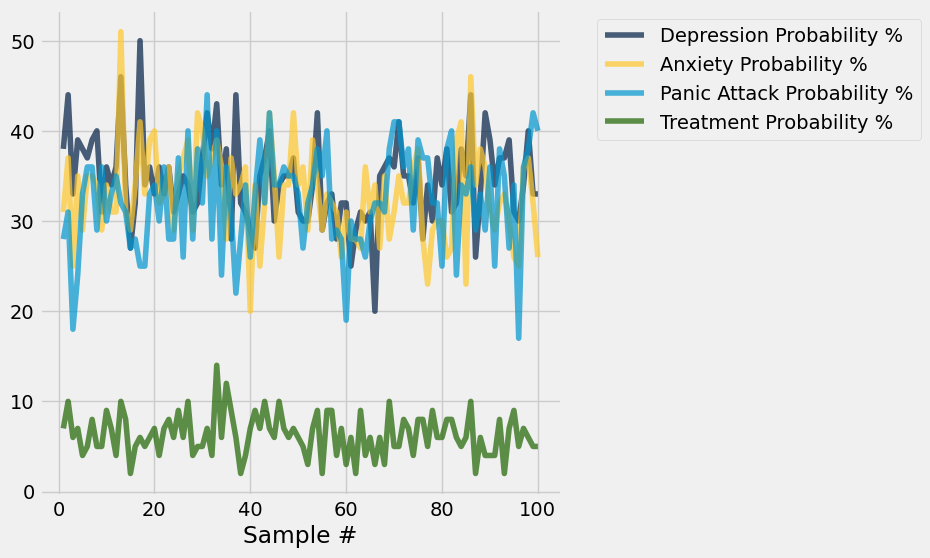

In [82]:
sample_table_all.plot("Sample #")

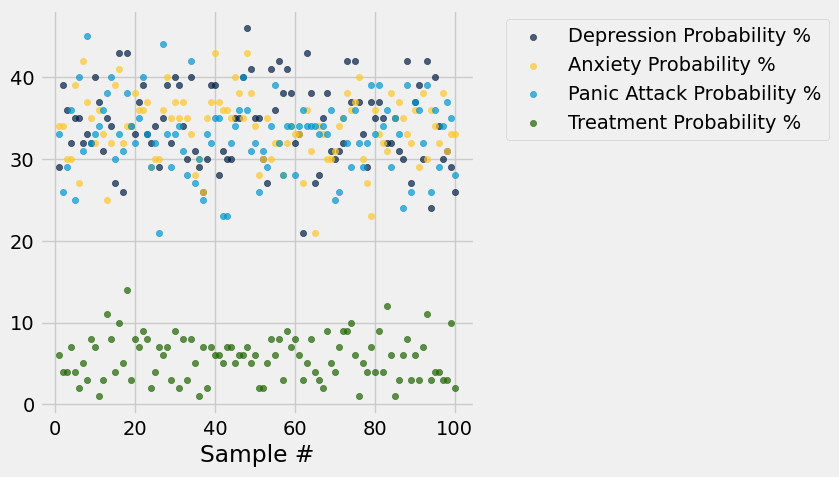

In [147]:
sample_table_all.scatter("Sample #")

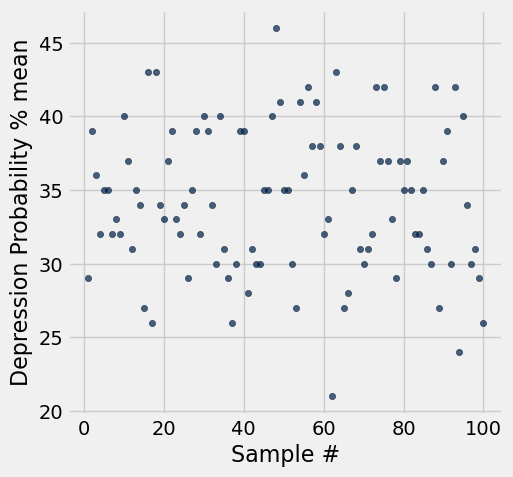

In [137]:
sample_table_all.group("Sample #",np.mean).scatter("Sample #","Depression Probability % mean")

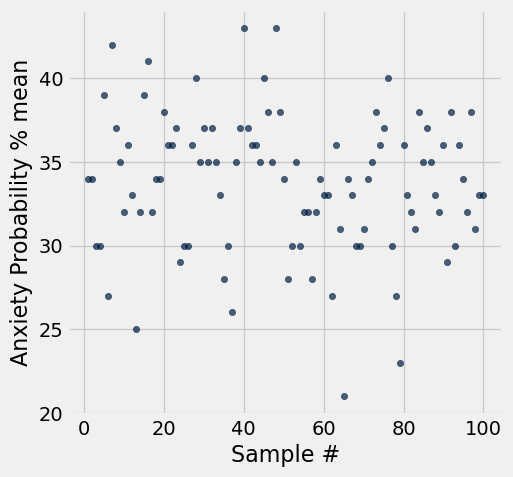

In [138]:
sample_table_all.group("Sample #",np.mean).scatter("Sample #","Anxiety Probability % mean")

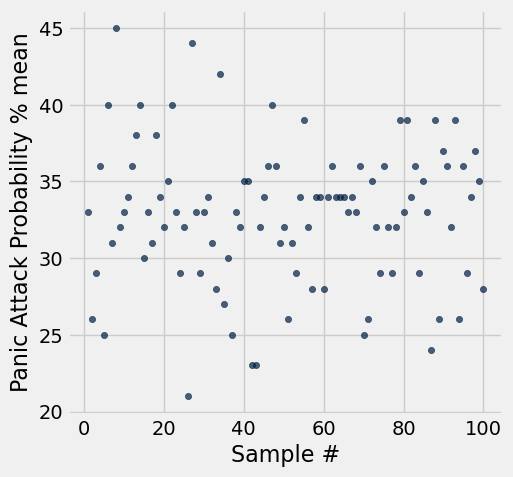

In [140]:
sample_table_all.group("Sample #",np.mean).scatter("Sample #","Panic Attack Probability % mean")

In [54]:
sample_table_all.group("Sample #",np.mean).scatter("Sample #","Treatment Probability % mean")

NameError: name 'sample_table_all' is not defined